In [1]:
import numpy as np
import pandas as pd
import pickle
import time
import itertools

import matplotlib
matplotlib.rcParams.update({'font.size': 17.5})

import matplotlib.pyplot as plt
%matplotlib inline

import sys
import os.path
sys.path.append( os.path.abspath(os.path.join( os.path.dirname('..') , os.path.pardir )) )

In [2]:
from FLAMEdb import *
from FLAMEbit import *
from data_generation import *

In [3]:
def construct_sec_order(arr):
    second_order_feature = []
    num_cov_sec = len(arr[0])
    for a in arr:
        tmp = []
        for i in range(num_cov_sec):
            for j in range(i+1, num_cov_sec):
                tmp.append( a[i] * a[j] )
        second_order_feature.append(tmp)
        
    return np.array(second_order_feature)

In [4]:
def ground_truth( eff_coef, covs_ordered, num_covs_dense = 10, num_second_order = 5, second_order = True):
    arr = np.array(list(itertools.product([0,1], repeat=num_covs_dense)))
    effect = np.dot(arr, eff_coef)
    if second_order:
        second_effect = np.sum(construct_sec_order(arr[:,:num_second_order] ), axis=1)
        effect = effect + second_effect
    df = pd.DataFrame(arr, columns=covs_ordered)
    df['effect'] = effect
    return df

In [8]:
d = data_generation_dense_2( 10000, 10000, 10, 30 - 10)
df = d[0]
holdout,_,_ = data_generation_dense_2( 10000, 10000, 10, 30-10 )

res = run_bit(df, holdout, range(30), [2]*30, tradeoff_param = 0.1)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 27, 29]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 27]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 27]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 17, 18, 20, 21, 22, 24, 25, 27]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 17, 18, 20, 21, 22, 24, 25, 27]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 17, 18, 20, 21, 22, 24, 25]

C:\Users\twang\Anaconda2\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\twang\Anaconda2\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 17, 18, 20, 21, 22, 24]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 17, 18, 20, 21, 22]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 18, 20, 21, 22]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 18, 20, 22]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 18, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 18, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 18, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 20]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 3, 4, 5, 6, 7, 9]
[0, 2, 3, 4, 5, 7, 9]
[0, 2, 3, 5, 7, 9]
[0, 2, 3, 5, 9]
[2, 3, 5, 9]
[2, 3, 9]
[2, 3]
no more matches


In [28]:
ground_truth = ground_truth(d[2], range(10), 5)

In [35]:
truth_list = []
pred_list = []

for r in res[1]:
    tmp = pd.merge(r, ground_truth, on = list(set(range(10)) & set(r.columns) ), how = 'left')
    truth_list = truth_list + list(tmp['effect_y'])
    pred_list = pred_list + list(tmp['effect_x'])

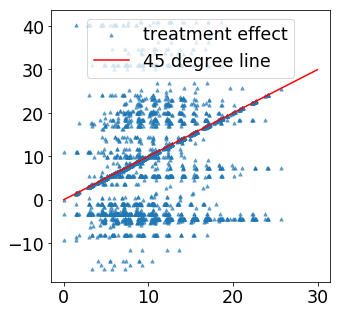

In [55]:
matplotlib.rcParams.update({'font.size': 17.5})
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5

scatter = plt.scatter(truth_list, pred_list, marker = '^', alpha = 0.6, s = 10, label = 'treatment effect')
l, = plt.plot(np.arange(0,30,0.05), np.arange(0,30,0.05), c = 'red', label = '45 degree line')

plt.legend(handles = [scatter, l])